In [240]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [241]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '10'

In [242]:
hq_list = ['Excellent Quality', 'Good Quality', 'Acceptable Quality']
lq_list = ['Low Quality', 'Very Low Quality']

In [243]:
# cemaden_path = r'.\1 - Organized data gauge\BRAZIL\QC_VALIDATION\DATASET\BRASIL_CEMADEN_TOTAL_DAILY_V3.h5'
cemaden_path = r'C:\Users\linde\OneDrive\Hidroweb\Consolidated Files\BRASIL_CEMADEN_TOTAL_DAILY.h5'

In [244]:
df_quality = pd.read_csv(r".\1 - Organized data gauge\BRAZIL\QC_VALIDATION\SUPPLEMENTARY_INFO\Estacoes_Alta_Qualidade_da_Analise_Visual.csv", sep=';')
df_quality

,AC_ 2014,AC_ 2015,AC_ 2016,AC_ 2017,AC_ 2018,AC_ 2019,AL_ 2014,AL_ 2015,AL_ 2016,AL_ 2017,...,MS_ 2022,GO_ 2022,DF_ 2022,ES_ 2022,MG_ 2022,RJ_ 2022,SP_ 2022,RS_ 2022,SC_ 2022,PR_ 2022
0,NaN,NaN,NaN,NaN,NaN,120010401A,NaN,270430205A,270060701A,270130801A,...,500110201A,520025801A,530010802A,320010207A,310110201A,330010001G,350050101A,430040601A,420050701A,410040002A
1,NaN,NaN,NaN,NaN,NaN,120070801A,NaN,270430207A,270130801A,270135701A,...,500190401A,520025803A,530010804A,320030001A,310170601A,330010007A,350050102A,430060402A,420130704A,410040003A
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430209A,270135701A,270430203A,...,500270401A,520030801A,530010805A,320040902A,310230801A,330010014A,350190501A,430060403A,420140601A,410040004A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430210A,270430202A,270430207A,...,500270402A,520110801A,NaN,320040903A,310470001A,330010015A,350190502A,430120601A,420150501A,410040006A
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430211A,270430209A,270430210A,...,500270403A,520140501A,NaN,320050801A,310560814A,330010017A,350250701A,430130501A,420180202A,410040008A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# Melt the DataFrame to pivot the column titles
df_quality.reset_index(drop=False, inplace=True)
melted_df = pd.DataFrame(pd.melt(df_quality, id_vars=['index'], var_name='uf_year', value_name='gauge_code'))
melted_df.drop(columns=['index'], inplace=True)
melted_df.dropna(inplace=True)
melted_df.reset_index(drop=True, inplace=True)
# Display the result
melted_df

,uf_year,gauge_code
0,AC_ 2019,120010401A
1,AC_ 2019,120070801A
2,AL_ 2015,270430205A
3,AL_ 2015,270430207A
4,AL_ 2015,270430209A
...,...,...
9977,PR_ 2022,412570401A
9978,PR_ 2022,412570402A
9979,PR_ 2022,412790801A
9980,PR_ 2022,412820301A


In [246]:
melted_df['year'] = (melted_df['uf_year'].str[-4:]).astype(int)
melted_df['visual_quality'] = 'HQ'
melted_df = melted_df[['gauge_code','year',	'visual_quality']]
melted_df

,gauge_code,year,visual_quality
0,120010401A,2019,HQ
1,120070801A,2019,HQ
2,270430205A,2015,HQ
3,270430207A,2015,HQ
4,270430209A,2015,HQ
...,...,...,...
9977,412570401A,2022,HQ
9978,412570402A,2022,HQ
9979,412790801A,2022,HQ
9980,412820301A,2022,HQ


In [247]:
df_cemaden_q_index = pd.read_hdf(cemaden_path, key = 'table_qc_info')
df_cemaden_q_index['year'] = df_cemaden_q_index['year'].astype(int)
# df_cemaden_q_index = df_cemaden_q_index[df_cemaden_q_index['year'] <= 2020]
df_cemaden_q_index

,gauge_code,year,preclassif,p_availability,q1_gaps,q2_week,q3_outliers,quality_index,quality_label,final_classif
0,110018901A,2018,,37.260274,100.000000,79.213015,98.082192,78.638870,4 - Low Quality,LQ
1,110018901A,2019,,94.794521,86.416185,91.236742,97.808219,92.563917,3 - Acceptable Quality,HQ
2,110018901A,2020,,10.382514,0.000000,67.725139,100.000000,44.526913,5 - Very Low Quality,LQ
3,110020501A,2014,LQ,4.383562,100.000000,65.984933,100.000000,67.592124,4 - Low Quality,LQ
4,110020501A,2017,LQ,1.643836,0.000000,61.509982,100.000000,40.788454,5 - Very Low Quality,LQ
...,...,...,...,...,...,...,...,...,...,...
22768,CEMADEN_12,2019,,24.657534,100.000000,90.159144,98.904110,78.430197,4 - Low Quality,LQ
22769,CEMADEN_12,2020,,8.469945,100.000000,88.614499,99.453552,74.134499,4 - Low Quality,LQ
22770,CEMADEN_13,2019,LQ,6.301370,17.391304,64.644661,99.726027,47.015841,5 - Very Low Quality,LQ
22771,CEMADEN_14,2018,,25.205479,100.000000,78.723842,98.356164,75.571371,4 - Low Quality,LQ


In [248]:
df_compare = pd.merge(df_cemaden_q_index, melted_df, how = 'left', on = ['gauge_code', 'year'])
df_compare['visual_quality'].fillna('LQ', inplace=True)
df_compare.sort_values('year', ascending = True, inplace=True, ignore_index=True)
df_compare

C:\Users\linde\AppData\Local\Temp\ipykernel_20972\2384638847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_compare['visual_quality'].fillna('LQ', inplace=True)


,gauge_code,year,preclassif,p_availability,q1_gaps,q2_week,q3_outliers,quality_index,quality_label,final_classif,visual_quality
0,351050020A,2014,,91.506849,100.000000,77.718755,99.452055,92.169415,3 - Acceptable Quality,HQ,HQ
1,261160605A,2014,,91.506849,100.000000,91.520028,97.260274,95.071788,3 - Acceptable Quality,HQ,LQ
2,420240410A,2014,,91.506849,100.000000,89.191393,97.534247,94.558122,3 - Acceptable Quality,HQ,HQ
3,431800202A,2014,LQ,7.397260,100.000000,65.007289,100.000000,68.101137,4 - Low Quality,LQ,LQ
4,230440006A,2014,,100.000000,100.000000,82.064130,98.630137,95.173567,1 - Excellent Quality,HQ,HQ
...,...,...,...,...,...,...,...,...,...,...,...
22768,420300601A,2020,,100.000000,100.000000,85.909481,97.267760,95.794310,1 - Excellent Quality,HQ,HQ
22769,314995201A,2020,,100.000000,100.000000,74.038078,98.907104,93.236295,1 - Excellent Quality,HQ,LQ
22770,315000001A,2020,,99.180328,97.520661,87.524436,97.814208,95.509908,1 - Excellent Quality,HQ,HQ
22771,314820201A,2020,,100.000000,100.000000,75.077280,97.267760,93.086260,1 - Excellent Quality,HQ,HQ


In [249]:
df_compare.to_excel('./5 - Results/df_qc_info_cemaden.xlsx', index=False, sheet_name='data')

In [250]:
# Selecionando apenas as colunas relevantes
columns_to_average = ['p_availability', 'q1_gaps', 'q2_week', 'q3_outliers']

# Agrupando por 'visual_quality' e calculando a média
mean_by_quality = df_compare.groupby('visual_quality')[columns_to_average].mean()

# Filtrando para mostrar apenas HQ e LQ, se necessário
mean_by_quality = mean_by_quality.loc[['HQ', 'LQ']]

# Exibindo o resultado
print(mean_by_quality)


                p_availability    q1_gaps    q2_week  q3_outliers
visual_quality                                                   
HQ                   98.323288  96.838448  85.915307    97.831391
LQ                   61.966862  69.330276  80.469120    98.764794


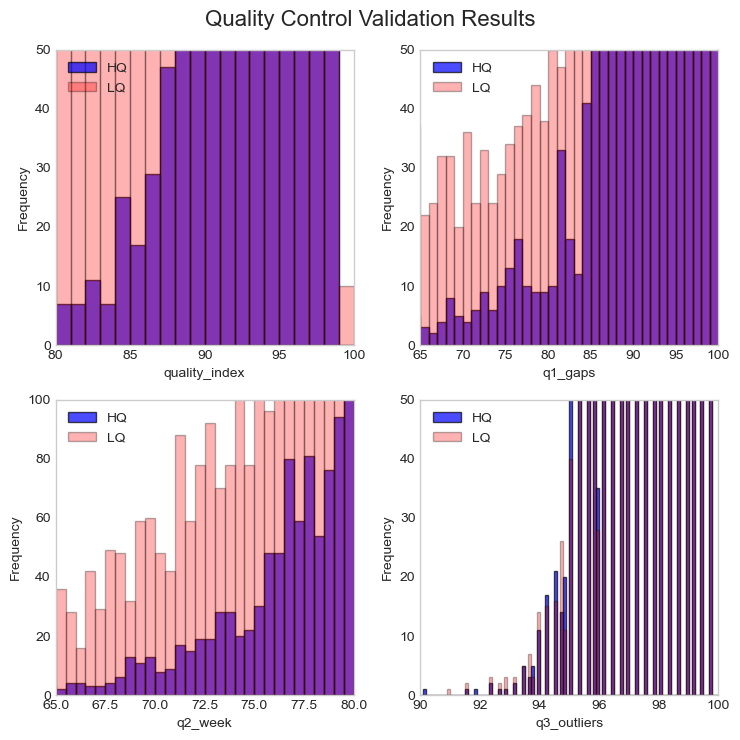

In [251]:
fig, axs = plt.subplots(2, 2, figsize=(7.5, 7.5), facecolor = None)

variable = 'quality_index'
df_hq = df_compare[(df_compare['visual_quality'] == 'HQ')
                   & (df_compare['preclassif'] != 'LQ')]
df_lq = df_compare[(df_compare['visual_quality'] == 'LQ')
                   & (df_compare['preclassif'] != 'LQ')]
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[0, 0].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[0, 0].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[0, 0].set_xlim(80, 100)
axs[0, 0].set_ylim(0, 50)

axs[0, 0].legend()
axs[0, 0].set_xlabel(variable)
axs[0, 0].set_ylabel('Frequency')

variable = 'q1_gaps'
df_hq = df_compare[(df_compare['visual_quality'] == 'HQ')
                   & (df_compare['preclassif'] != 'LQ')]
df_lq = df_compare[(df_compare['visual_quality'] == 'LQ')
                   & (df_compare['preclassif'] != 'LQ')]
q1_gaps_hq = df_hq[variable].mean()
q1_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[0, 1].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[0, 1].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[0, 1].set_xlim(65, 100)
axs[0, 1].set_ylim(0, 50)

axs[0, 1].legend()  
axs[0, 1].set_xlabel(variable)
axs[0, 1].set_ylabel('Frequency')

variable = 'q2_week'
df_hq = df_compare[(df_compare['visual_quality'] == 'HQ')
                   & (df_compare['preclassif'] != 'LQ')]
df_lq = df_compare[(df_compare['visual_quality'] == 'LQ')
                   & (df_compare['preclassif'] != 'LQ')]
q2_gaps_hq = df_hq[variable].mean()
q2_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 0.5  # Adjust as needed
# Calculate bin edges    
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[1, 0].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[1, 0].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[1, 0].set_xlim(65, 80)
axs[1, 0].set_ylim(0, 100)

axs[1, 0].legend()
axs[1, 0].set_xlabel(variable)
axs[1, 0].set_ylabel('Frequency')

variable = 'q3_outliers'
df_hq = df_compare[(df_compare['visual_quality'] == 'HQ')
                   & (df_compare['preclassif'] != 'LQ')]
df_lq = df_compare[(df_compare['visual_quality'] == 'LQ')
                   & (df_compare['preclassif'] != 'LQ')]
q3_gaps_hq = df_hq[variable].mean()
q3_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 0.1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[1, 1].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[1, 1].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[1, 1].set_xlim(90, 100)
axs[1, 1].set_ylim(0, 50)

axs[1, 1].legend()
axs[1, 1].set_xlabel(variable)
axs[1, 1].set_ylabel('Frequency')

plt.suptitle('Quality Control Validation Results', fontsize=16)

plt.tight_layout()
plt.savefig(r".\Figures\cemaden_qcp_result.tiff", transparent=False, format='tiff', dpi=300, bbox_inches='tight' )
plt.show()
plt.close()

In [252]:
df_compare['q1_gaps'].mean()

78.2025163532823

In [253]:
df_compare['q2_week'].median()

84.87075105622048

In [254]:
# Initialize an empty DataFrame to store results
df_results = pd.DataFrame()

# Nested loops for weights
for w1 in range(1, 5):
    for w2 in range(1, 5):
        for w3 in range(1, 5):
            for w4 in range(1, 5):
                # Calculate the quality index
                df_compare['quality_index_new'] = (
                    w1 * df_compare['p_availability'] +
                    w2 * df_compare['q1_gaps'] +
                    w3 * df_compare['q2_week'] +
                    w4 * df_compare['q3_outliers']
                ) / (w1 + w2 + w3 + w4)
                
                # Apply the conditions to set quality_label
                df_compare['quality_label_new'] = 'HQ'
                df_compare.loc[df_compare['quality_index_new'] < 80, 'quality_label_new'] = 'LQ'
                df_compare.loc[df_compare['preclassif'] == 'LQ', 'quality_label_new'] = 'LQ'
                df_compare.loc[df_compare['p_availability'] < 90, 'quality_label_new'] = 'LQ'
                
                # Store the results for the current weights
                df_temp = df_compare[['gauge_code', 'year', 'quality_index_new', 'quality_label_new', 'visual_quality']].copy()
                df_temp['w1'] = w1
                df_temp['w2'] = w2
                df_temp['w3'] = w3
                df_temp['w4'] = w4

                # Calculate confusion matrix
                actual = df_temp['visual_quality'].values
                predicted = df_temp['quality_label_new'].values
                confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=['HQ', 'LQ'])

                # Extract values from confusion matrix
                TP, FN = confusion_matrix[0, 0], confusion_matrix[0, 1]
                FP, TN = confusion_matrix[1, 0], confusion_matrix[1, 1]

                # Calculate metrics
                precision = TP / (TP + FP) if (TP + FP) > 0 else 0
                recall = TP / (TP + FN) if (TP + FN) > 0 else 0
                accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
                f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

                # Create a DataFrame for the current metrics
                df_metrics = pd.DataFrame([{
                    'w1': w1, 'w2': w2, 'w3': w3, 'w4': w4,
                    'accuracy': accuracy, 'precision': precision,
                    'recall': recall, 'f1_score': f1_score
                }])

                # Concatenate the metrics DataFrame to df_results
                if df_results.empty:
                    df_results = df_metrics.copy(deep=True)
                else:
                    df_results = pd.concat([df_results, df_metrics], ignore_index=True)
                
                print(f"w1: {w1}, w2: {w2}, w3: {w3}, w4: {w4} - f1_score: {f1_score:.4f}")

                

# Display the resulting DataFrame
df_results.sort_values(by=['f1_score'], ascending=False, inplace=True, ignore_index=True)
df_results

w1: 1, w2: 1, w3: 1, w4: 1 - f1_score: 0.7620
w1: 1, w2: 1, w3: 1, w4: 2 - f1_score: 0.7620
w1: 1, w2: 1, w3: 1, w4: 3 - f1_score: 0.7620
w1: 1, w2: 1, w3: 1, w4: 4 - f1_score: 0.7620
w1: 1, w2: 1, w3: 2, w4: 1 - f1_score: 0.7620
w1: 1, w2: 1, w3: 2, w4: 2 - f1_score: 0.7620
w1: 1, w2: 1, w3: 2, w4: 3 - f1_score: 0.7620
w1: 1, w2: 1, w3: 2, w4: 4 - f1_score: 0.7620
w1: 1, w2: 1, w3: 3, w4: 1 - f1_score: 0.7620
w1: 1, w2: 1, w3: 3, w4: 2 - f1_score: 0.7621
w1: 1, w2: 1, w3: 3, w4: 3 - f1_score: 0.7620
w1: 1, w2: 1, w3: 3, w4: 4 - f1_score: 0.7620
w1: 1, w2: 1, w3: 4, w4: 1 - f1_score: 0.7619
w1: 1, w2: 1, w3: 4, w4: 2 - f1_score: 0.7620
w1: 1, w2: 1, w3: 4, w4: 3 - f1_score: 0.7621
w1: 1, w2: 1, w3: 4, w4: 4 - f1_score: 0.7620
w1: 1, w2: 2, w3: 1, w4: 1 - f1_score: 0.7620
w1: 1, w2: 2, w3: 1, w4: 2 - f1_score: 0.7620
w1: 1, w2: 2, w3: 1, w4: 3 - f1_score: 0.7620
w1: 1, w2: 2, w3: 1, w4: 4 - f1_score: 0.7620
w1: 1, w2: 2, w3: 2, w4: 1 - f1_score: 0.7620
w1: 1, w2: 2, w3: 2, w4: 2 - f1_sc

,w1,w2,w3,w4,accuracy,precision,recall,f1_score
0,1,4,1,1,0.803144,0.624154,0.979442,0.762440
1,2,4,1,1,0.802837,0.623689,0.979986,0.762258
2,1,4,2,1,0.802968,0.624024,0.978897,0.762177
3,2,3,4,2,0.802749,0.623603,0.979850,0.762152
4,1,4,3,1,0.802925,0.623969,0.978897,0.762137
...,...,...,...,...,...,...,...,...
251,1,1,4,1,0.803364,0.625033,0.975630,0.761935
252,1,4,1,2,0.802485,0.623257,0.979986,0.761935
253,3,1,4,2,0.802529,0.623354,0.979714,0.761925
254,1,3,3,1,0.802705,0.623720,0.978761,0.761910


In [281]:
df_results.sort_values(by=['f1_score'], ascending=False, inplace=True, ignore_index=True)
df_results


,w1,w2,w3,w4,accuracy,precision,recall,f1_score
0,1,4,1,1,0.803144,0.624154,0.979442,0.762440
1,2,4,1,1,0.802837,0.623689,0.979986,0.762258
2,1,4,2,1,0.802968,0.624024,0.978897,0.762177
3,2,3,4,2,0.802749,0.623603,0.979850,0.762152
4,1,4,3,1,0.802925,0.623969,0.978897,0.762137
...,...,...,...,...,...,...,...,...
251,1,1,4,1,0.803364,0.625033,0.975630,0.761935
252,1,4,1,2,0.802485,0.623257,0.979986,0.761935
253,3,1,4,2,0.802529,0.623354,0.979714,0.761925
254,1,3,3,1,0.802705,0.623720,0.978761,0.761910


In [280]:
df_results.sort_values(by=['w1', 'w2', 'w3', 'w4'], ascending=True, inplace=True, ignore_index=True)
df_results.reset_index(drop=True, inplace=True)
df_results

,w1,w2,w3,w4,accuracy,precision,recall,f1_score
0,1,1,1,1,0.802573,0.623344,0.980123,0.762041
1,1,1,1,2,0.802529,0.623290,0.980123,0.762001
2,1,1,1,3,0.802529,0.623290,0.980123,0.762001
3,1,1,1,4,0.802529,0.623290,0.980123,0.762001
4,1,1,2,1,0.802661,0.623538,0.979578,0.762021
...,...,...,...,...,...,...,...,...
251,4,4,3,4,0.802529,0.623290,0.980123,0.762001
252,4,4,4,1,0.802661,0.623495,0.979850,0.762071
253,4,4,4,2,0.802573,0.623365,0.979986,0.762016
254,4,4,4,3,0.802573,0.623344,0.980123,0.762041


C:\Users\linde\AppData\Local\Temp\ipykernel_20972\3228355301.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare, x='visual_quality', y='std_mean_ratio', palette='Set2')


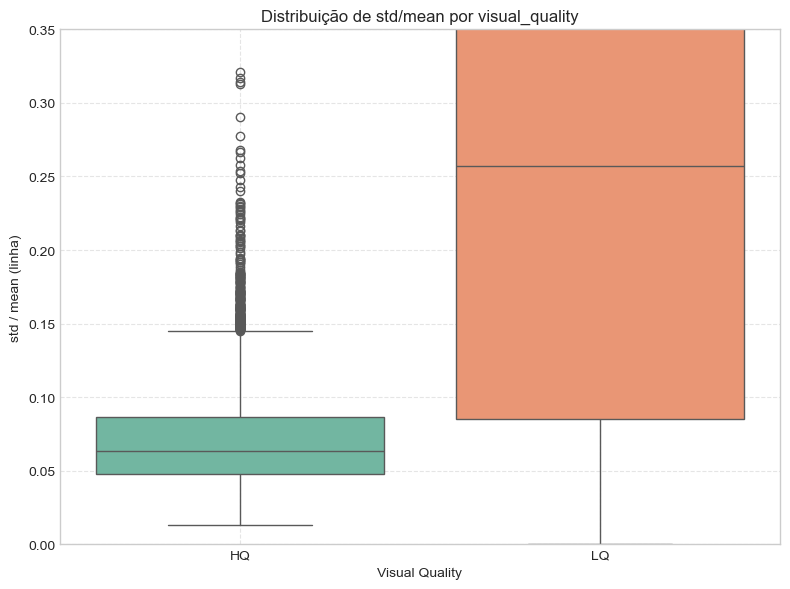

In [257]:
import seaborn as sns
cols = ['p_availability', 'q1_gaps', 'q2_week', 'q3_outliers']

# 1. Calcular std linha a linha
df_compare['std_row'] = df_compare[cols].std(axis=1)
df_compare['std_mean_ratio'] = df_compare['std_row'] / df_compare[cols].mean(axis=1)

# 2. Plotar std_mean_ratio por visual_quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_compare, x='visual_quality', y='std_mean_ratio', palette='Set2')
plt.ylim(0, 0.35)
plt.title('Distribuição de std/mean por visual_quality')
plt.ylabel('std / mean (linha)')
plt.xlabel('Visual Quality')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_20972\3976679230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare, x='visual_quality', y='std_row', palette='Set2')


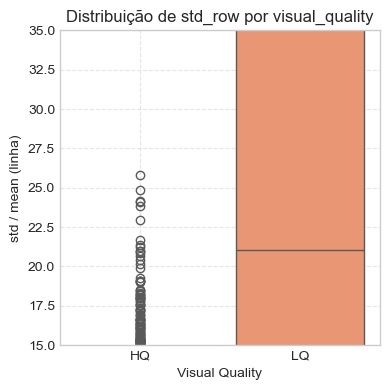

In [258]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_compare, x='visual_quality', y='std_row', palette='Set2')
plt.title('Distribuição de std_row por visual_quality')
plt.ylabel('std / mean (linha)')
plt.xlabel('Visual Quality')
plt.ylim(15, 35)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [259]:
df_metrics = pd.DataFrame([], columns=['i', 'j', 'k', 'precision', 'accuracy', 'recall', 'f1_score'])
for i in np.arange(50, 100, 10):
    for j in np.arange(50, 100, 10):
        for k in np.arange(50, 100, 10):
            df_compare['refinement_status'] = np.where(
                (df_compare['q1_gaps'] < i)
                | (df_compare['q2_week'] < j) 
                | (df_compare['q3_outliers'] < k),
                'LQ',
                df_compare['final_classif']
                )
            print(i, j, k)
            # Example confusion matrix data (replace this with your actual data)
            actual = np.array(df_compare['visual_quality'].values.tolist())
            predicted = np.array(df_compare['refinement_status'].values.tolist())
            # Calculate confusion matrix
            confusion_matrix = metrics.confusion_matrix(actual, predicted)
            # Normalize to percentages
            row_sums = confusion_matrix.sum(axis=1)
            row_sums[row_sums == 0] = 1  # Avoid division by zero
            confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100
            TP, FN = confusion_matrix[0, 0], confusion_matrix[0, 1]
            FP, TN = confusion_matrix[1, 0], confusion_matrix[1, 1]
            precision = TP / (TP + FP)
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            f1_score = 2 * (precision * recall) / (precision + recall)
            metrics_list = [i, j, k, precision, accuracy, recall, f1_score]
            # Append the metrics to the DataFrame
            df_metrics.loc[len(df_metrics)] = metrics_list

50 50 50
50 50 60
50 50 70
50 50 80
50 50 90
50 60 50
50 60 60
50 60 70
50 60 80
50 60 90
50 70 50
50 70 60
50 70 70
50 70 80
50 70 90
50 80 50
50 80 60
50 80 70
50 80 80
50 80 90
50 90 50
50 90 60
50 90 70
50 90 80
50 90 90
60 50 50
60 50 60
60 50 70
60 50 80
60 50 90
60 60 50
60 60 60
60 60 70
60 60 80
60 60 90
60 70 50
60 70 60
60 70 70
60 70 80
60 70 90
60 80 50
60 80 60
60 80 70
60 80 80
60 80 90
60 90 50
60 90 60
60 90 70
60 90 80
60 90 90
70 50 50
70 50 60
70 50 70
70 50 80
70 50 90
70 60 50
70 60 60
70 60 70
70 60 80
70 60 90
70 70 50
70 70 60
70 70 70
70 70 80
70 70 90
70 80 50
70 80 60
70 80 70
70 80 80
70 80 90
70 90 50
70 90 60
70 90 70
70 90 80
70 90 90
80 50 50
80 50 60
80 50 70
80 50 80
80 50 90
80 60 50
80 60 60
80 60 70
80 60 80
80 60 90
80 70 50
80 70 60
80 70 70
80 70 80
80 70 90
80 80 50
80 80 60
80 80 70
80 80 80
80 80 90
80 90 50
80 90 60
80 90 70
80 90 80
80 90 90
90 50 50
90 50 60
90 50 70
90 50 80
90 50 90
90 60 50
90 60 60
90 60 70
90 60 80
90 60 90
90 70 50
9

In [260]:
df_metrics_v2 = df_metrics[(df_metrics['i'] == df_metrics['j']) & (df_metrics['i'] == df_metrics['k'])]
df_metrics_v2.sort_values(['precision', 'i', 'j', 'k'], ascending=False, inplace=True, ignore_index=True)    
df_metrics_v2.head(30)

# 95.0	50.0	90.0	0.575130	0.755149	0.921852	0.708338

C:\Users\linde\AppData\Local\Temp\ipykernel_20972\1988480714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics_v2.sort_values(['precision', 'i', 'j', 'k'], ascending=False, inplace=True, ignore_index=True)


,i,j,k,precision,accuracy,recall,f1_score
0,80.0,80.0,80.0,0.629825,0.790014,0.846426,0.722235
1,70.0,70.0,70.0,0.625593,0.802968,0.969095,0.760348
2,60.0,60.0,60.0,0.623505,0.802617,0.979442,0.761955
3,50.0,50.0,50.0,0.623365,0.802573,0.979986,0.762016
4,90.0,90.0,90.0,0.597146,0.700786,0.222192,0.323874


In [261]:
lower_limit = 70

df_compare['refinement_status'] = np.where(
    # (df_compare['q1_gaps'] < lower_limit) |
    # (df_compare['q2_week'] < lower_limit) |
    # (df_compare['q3_outliers'] < lower_limit) |
    (df_compare['quality_index'] < 80) |
    (df_compare['p_availability'] < 90) |
    (df_compare['preclassif'] == 'LQ') |
    (df_compare['final_classif'] == 'LQ'),
    'LQ',
    df_compare['final_classif']
)

df_compare.sort_values(['quality_label', 'quality_index'], ascending = True, inplace=True, ignore_index=True)
df_compare.head(30)

,gauge_code,year,preclassif,p_availability,q1_gaps,q2_week,q3_outliers,quality_index,quality_label,final_classif,visual_quality,quality_index_new,quality_label_new,std_row,std_mean_ratio,refinement_status
0,354340224H,2019,LQ,100.000000,100.000000,60.000000,100.000000,90.000000,1 - Excellent Quality,LQ,LQ,90.000000,LQ,20.000000,0.222222,LQ
1,314620601A,2020,LQ,100.000000,100.000000,60.000000,100.000000,90.000000,1 - Excellent Quality,LQ,LQ,90.000000,LQ,20.000000,0.222222,LQ
2,320230603A,2018,LQ,99.726027,99.175824,61.270167,100.000000,90.043005,1 - Excellent Quality,LQ,LQ,90.043005,LQ,19.184953,0.213064,LQ
3,330390613A,2017,,99.452055,98.347107,65.149481,97.260274,90.052229,1 - Excellent Quality,HQ,HQ,90.052229,HQ,16.625929,0.184625,HQ
4,351040118H,2020,,100.000000,100.000000,60.604985,100.000000,90.151246,1 - Excellent Quality,HQ,LQ,90.151246,HQ,19.697507,0.218494,HQ
5,312980604A,2017,,100.000000,100.000000,62.594426,98.082192,90.169154,1 - Excellent Quality,HQ,LQ,90.169154,HQ,18.405369,0.204120,HQ
6,330120702A,2017,,100.000000,100.000000,61.614173,99.178082,90.198064,1 - Excellent Quality,HQ,LQ,90.198064,HQ,19.059866,0.211311,HQ
7,293105301C,2018,LQ,100.000000,100.000000,60.876960,100.000000,90.219240,1 - Excellent Quality,LQ,LQ,90.219240,LQ,19.561520,0.216822,LQ
8,261110101A,2017,LQ,100.000000,100.000000,61.200820,99.726027,90.231712,1 - Excellent Quality,LQ,LQ,90.231712,LQ,19.354359,0.214496,LQ
9,291170901C,2018,,99.452055,98.347107,64.505466,98.630137,90.233691,1 - Excellent Quality,HQ,LQ,90.233691,HQ,17.158551,0.190157,HQ


In [262]:
# Count where preclassif equals visual_quality
count_equal = ((df_compare['refinement_status'] == df_compare['visual_quality'])
               & (df_compare['preclassif'] != 'LQ')).sum()  # Fixed the position of .sum()

# Count where preclassif does not equal visual_quality
count_not_equal = ((df_compare['refinement_status'] != df_compare['visual_quality'])
                   & (df_compare['preclassif'] != 'LQ')).sum()  # Fixed the position of .sum()

print("Count where refinement_status == visual_quality:", count_equal)
print("Count where refinement_status != visual_quality:", count_not_equal)

Count where refinement_status == visual_quality: 14083
Count where refinement_status != visual_quality: 4465


In [263]:
# Count where preclassif equals visual_quality
count_equal = ((df_compare['preclassif'] == df_compare['visual_quality'])
               & (df_compare['preclassif'] == 'LQ')).sum()  # Fixed the position of .sum()

# Count where preclassif does not equal visual_quality
count_not_equal = ((df_compare['preclassif'] != df_compare['visual_quality'])
                   & (df_compare['preclassif'] == 'LQ')).sum()  # Fixed the position of .sum()

print("Count where preclassif == visual_quality:", count_equal)
print("Count where preclassif != visual_quality:", count_not_equal)

Count where preclassif == visual_quality: 4194
Count where preclassif != visual_quality: 31


In [264]:
df_compare.to_excel(r'.\5 - Results\df_qualidade_cemaden.xlsx', index=False, sheet_name='data')

In [265]:
# Example confusion matrix data (replace this with your actual data)
actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['refinement_status'].values.tolist())

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Normalize to percentages
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100
confusion_matrix_percentage

# array([[99.44179714,  0.55820286],
#        [42.52009334, 57.47990666]])

# array([[92.41660994,  7.58339006],
#        [35.96059113, 64.03940887]])

array([[98.01225323,  1.98774677],
       [28.19548872, 71.80451128]])

In [266]:
confusion_matrix

array([[ 7199,   146],
       [ 4350, 11078]], dtype=int64)

In [267]:
TP, FN = confusion_matrix[0, 0], confusion_matrix[0, 1]
FP, TN = confusion_matrix[1, 0], confusion_matrix[1, 1]

precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)

print("Precision:", f"{precision:.3f}")
print("Accuracy:", f"{accuracy:.3f}")
print("Recall:", f"{recall:.3f}")

# Precision: 0.552
# Accuracy: 0.733
# Recall: 0.913

# Precision: 0.550
# Accuracy: 0.732
# Recall: 0.924

Precision: 0.623
Accuracy: 0.803
Recall: 0.980


In [268]:
mc00 = ("("+str(round(confusion_matrix_percentage[0][0], 1))+"%)")
mc01 = ("("+str(round(confusion_matrix_percentage[0][1], 1))+"%)")
mc10 = ("("+str(round(confusion_matrix_percentage[1][0], 1))+"%)")
mc11 = ("("+str(round(confusion_matrix_percentage[1][1], 1))+"%)")
print(mc00, mc01, mc10, mc11)

(98.0%) (2.0%) (28.2%) (71.8%)


<Figure size 550x450 with 0 Axes>

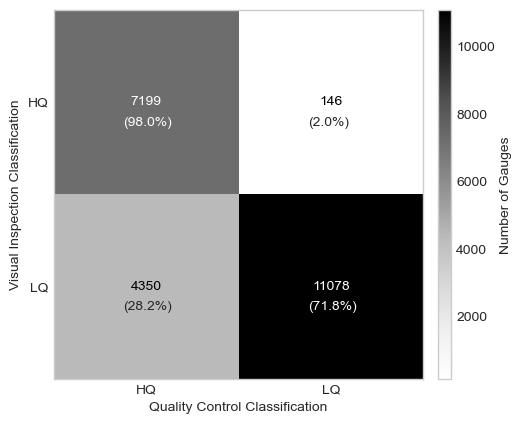

In [269]:
# Set the figure size
plt.figure(figsize=(5.5, 4.5))

actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['final_classif'].values.tolist())

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)
# Normalize to percentages
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
# confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100

# Display labels
class_names = ['HQ','LQ']

# Plotting the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
cm_display.plot(cmap='Greys', values_format='.0f', include_values=True, colorbar=False)

plt.text(-0.125, 0.125, mc00, fontsize=10, color = 'white')
plt.text(0.875, 0.125, mc01, fontsize=10)
plt.text(-0.125, 1.125, mc10, fontsize=10)
plt.text(0.875, 1.125, mc11, fontsize=10, color = 'white')
# Change axes names
plt.ylabel('Visual Inspection Classification')
plt.xlabel('Quality Control Classification')
# plt.title('Confusion Matrix of the QCP (%)', pad = 5)

# Get the current figure and create axes for the color bar
fig = plt.gcf()
cax = fig.add_axes([0.825, 0.11, 0.02, 0.77])  # [left, bottom, width, height]

# Plot the color bar using the existing mappable
cbar = plt.colorbar(cm_display.im_, cax=cax)
cbar.set_label('Number of Gauges')
# cbar.set_ticks([0, 25, 50, 75, 100])

# plt.tight_layout()
plt.savefig('./figures/cemaden_confusion_matrix.tiff', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [270]:
confusion_matrix_percentage

array([[98.01225323,  1.98774677],
       [28.19548872, 71.80451128]])

In [271]:
for year in df_compare['year'].drop_duplicates().values.tolist():
    df_year = df_compare[df_compare['year'] == year]
    count_hq_hq = ((df_year['final_classif'] == 'HQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_hq_lq = ((df_year['final_classif'] == 'HQ') & (df_year['visual_quality'] == 'LQ')).sum()
    count_lq_hq = ((df_year['final_classif'] == 'LQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_lq_lq = ((df_year['final_classif'] == 'LQ') & (df_year['visual_quality'] == 'LQ')).sum()

    sucess = (count_hq_hq + count_lq_lq) / (len(df_year))
    print(year, sucess, count_hq_hq+count_hq_lq+count_lq_hq+ count_lq_lq - len(df_year))

2019 0.7824842587292501 0
2020 0.8109946160385378 0
2018 0.8178496868475992 0
2017 0.7592539454806313 0
2015 0.8135856079404467 0
2016 0.7914277090250528 0
2014 0.8734177215189873 0


In [272]:
count_hq_hq = ((df_compare['final_classif'] == 'HQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_hq_lq = ((df_compare['final_classif'] == 'HQ') & (df_compare['visual_quality'] == 'LQ')).sum()
count_lq_hq = ((df_compare['final_classif'] == 'LQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_lq_lq = ((df_compare['final_classif'] == 'LQ') & (df_compare['visual_quality'] == 'LQ')).sum()

sucess = (count_hq_hq + count_lq_lq) / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
sucess

80.2573222675976

In [273]:
count_by_quality_label = df_compare.groupby('quality_label')['quality_label'].count().reset_index(name='count')

# Print or use the resulting DataFrame
print(count_by_quality_label)

            quality_label  count
0   1 - Excellent Quality   6673
1        2 - Good Quality   3521
2  3 - Acceptable Quality   1914
3         4 - Low Quality   9387
4    5 - Very Low Quality   1278


In [274]:
count_by_quality_label['count'].sum()

22773

In [275]:
count_pivot = df_compare.pivot_table(index='quality_label', columns='visual_quality', aggfunc='size', fill_value=0)
count_pivot.reset_index(drop = False, inplace = True)
count_pivot

visual_quality,quality_label,HQ,LQ
0,1 - Excellent Quality,4402,2271
1,2 - Good Quality,2096,1425
2,3 - Acceptable Quality,728,1186
3,4 - Low Quality,119,9268
4,5 - Very Low Quality,0,1278


In [276]:
type_error_1 = count_lq_hq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_1, "%")

0.64111008650595 %


In [277]:
type_error_2 = count_hq_lq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_2, "%")

19.101567645896456 %
